In [2]:
using CSV
using DataFrames
using LinearAlgebra
using Plots
using Convex, SCS

# Excercise 1

* Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.

* Los datos deben mostrar una tendencia lineal
* Los residuos deben ser casi normales.
* La variabilidad de los puntos alrededor de la línea de mínimos cuadrados permanece aproximadamente constante

# Exercise  2

Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.


I Use $y = a +bx + cx^{2} + dx^{3} + ex^{4} + fx^{5}$

In [155]:
dataBitcoin = CSV.read("Data/Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float16, dataBitcoin.Price);

select!(dataBitcoin, ["PriceFloat"])
rename!(dataBitcoin, :PriceFloat => :Price)

N = nrow(dataBitcoin)
y = Array(dataBitcoin.Price)
x = Array((1:N));

A = [x.^0 x x.^2 x.^3 x.^4 x.^5]


p = A\y                #A*p = y

6-element Vector{Float64}:
 31274.21962864831
  5759.803244538628
 -1019.0722035711374
    71.83101890002764
    -2.181236247230827
     0.024056247067431952

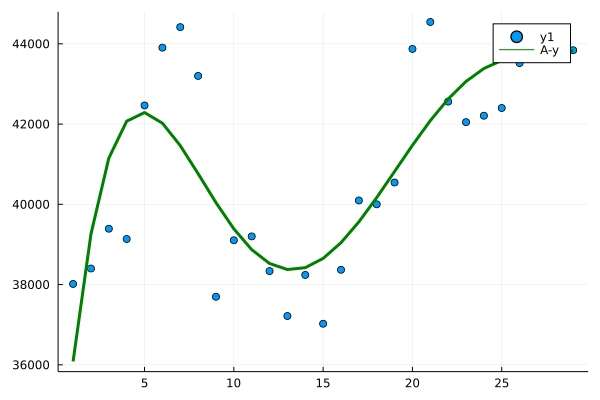

In [188]:
p = A\y                    
X = LinRange(minimum(x),maximum(x),29)

F = Array{Float64}(undef,29)
for i in 1:29
    F[i] = p[1] + p[2]*x[i] + p[3]*x[i]^2 + p[4]*x[i]^3 + p[5]*x[i]^4 +p[6]*x[i]^5
end

plot(x,y,seriestype = :scatter)
plot!(X, F, linewidth=3, levels=[1], color=:green, label="A-y")


Minimize

In [187]:
b_t = y
x_t = Variable(size(A,2))
problem = minimize(square(norm(A * x_t - b_t )))
solve!(problem, SCS.Optimizer; silent_solver = true)
problem.status
p = x_t.value

┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex C:\Users\Christian Pabon\.julia\packages\Convex\o98db\src\solution.jl:342


6×1 Matrix{Float64}:
    -7.875703574589567e9
     6.131320831828094e9
    -1.2949172717608285e9
     1.0937402842029695e8
    -3.9872448880223157e6
 52349.17262427491

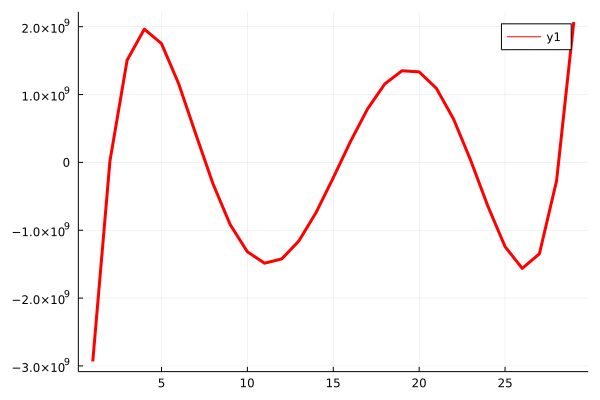

In [181]:
p = x_t.value
X = LinRange(minimum(x),maximum(x),29)
Y = LinRange(minimum(y),maximum(y),29)

F = Array{Float64}(undef,29)
for i in 1:29
    F[i] = p[1] + p[2]*x[i] + p[3]*x[i]^2 + p[4]*x[i]^3 + p[5]*x[i]^4 +p[6]*x[i]^5
end
plot(X, F, linewidth=3 , color=:red)

# Exercise  3

Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

In [4]:
dataBitcoin = CSV.read("Data/Bitcoin1Y.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

dataOil = CSV.read("Data/Oil1Y.csv",DataFrame);

dataSilver = CSV.read("Data/Silver1Y.csv",DataFrame);

dataGold = CSV.read("Data/Gold1Y.csv",DataFrame);
dataGold.Price .= replace.(dataGold.Price, "," => "");
dataGold.PriceFloat = parse.(Float64, dataGold.Price);

select!(dataBitcoin, [:"Date", :"PriceFloat"])
rename!(dataBitcoin, :PriceFloat => :PriceBitcoin)
select!(dataOil, [:"Date", :"Price"])
rename!(dataOil, :Price => :PriceOil)
select!(dataSilver, [:"Date", :"Price"])
rename!(dataSilver, :Price => :PriceSilver)
select!(dataGold, [:"Date", :"PriceFloat"])
rename!(dataGold, :PriceFloat => :PriceGold)

,Date,PriceGold
,String15,Float64
1,"Mar 25, 2022",1957.75
2,"Mar 24, 2022",1962.2
3,"Mar 23, 2022",1937.3
4,"Mar 22, 2022",1921.5
5,"Mar 21, 2022",1929.5
6,"Mar 18, 2022",1929.3
7,"Mar 17, 2022",1943.2
8,"Mar 16, 2022",1909.2
9,"Mar 15, 2022",1929.7


In [5]:
dataBitcoin

,Date,PriceBitcoin
,String15,Float64
1,"Mar 26, 2022",44377.0
2,"Mar 25, 2022",44337.0
3,"Mar 24, 2022",44003.0
4,"Mar 23, 2022",42882.0
5,"Mar 22, 2022",42370.0
6,"Mar 21, 2022",41031.0
7,"Mar 20, 2022",41249.0
8,"Mar 19, 2022",42214.0
9,"Mar 18, 2022",41774.0


In [6]:
dataOil = CSV.read("Data/Oil1Y.csv",DataFrame);

In [7]:
dataOil

,Date,Price,Open,High,Low,Vol.,Change %
,String15,Float64,Float64,Float64,Float64,String7,String7
1,"Mar 25, 2022",112.58,112.01,114.08,108.77,-,0.21%
2,"Mar 24, 2022",112.34,114.47,116.64,110.61,307.24K,-2.25%
3,"Mar 23, 2022",114.93,108.85,115.4,108.38,289.18K,2.84%
4,"Mar 22, 2022",111.76,112.9,115.01,109.3,22.94K,-0.32%
5,"Mar 21, 2022",112.12,105.13,112.69,104.08,77.22K,7.09%
6,"Mar 18, 2022",104.7,103.62,106.28,102.3,74.25K,1.67%
7,"Mar 17, 2022",102.98,95.34,104.24,94.85,210.76K,8.35%
8,"Mar 16, 2022",95.04,95.23,99.22,94.07,293.95K,-1.45%
9,"Mar 15, 2022",96.44,102.28,102.58,93.53,401.69K,-6.38%


In [8]:
dataSilver

,Date,PriceSilver
,String15,Float64
1,"Mar 25, 2022",25.735
2,"Mar 24, 2022",25.92
3,"Mar 23, 2022",25.189
4,"Mar 22, 2022",24.904
5,"Mar 21, 2022",25.313
6,"Mar 20, 2022",25.047
7,"Mar 18, 2022",25.087
8,"Mar 17, 2022",25.616
9,"Mar 16, 2022",24.71


In [9]:
dataGold

,Date,PriceGold
,String15,Float64
1,"Mar 25, 2022",1957.75
2,"Mar 24, 2022",1962.2
3,"Mar 23, 2022",1937.3
4,"Mar 22, 2022",1921.5
5,"Mar 21, 2022",1929.5
6,"Mar 18, 2022",1929.3
7,"Mar 17, 2022",1943.2
8,"Mar 16, 2022",1909.2
9,"Mar 15, 2022",1929.7


In [10]:
dataTotal = innerjoin(dataBitcoin, dataGold, dataOil, dataSilver, on = :"Date")
dataTotal

,Date,PriceBitcoin,PriceGold,Price,Open,High,Low,Vol.
,String15,Float64,Float64,Float64,Float64,Float64,Float64,String7
1,"Mar 25, 2022",44337.0,1957.75,112.58,112.01,114.08,108.77,-
2,"Mar 24, 2022",44003.0,1962.2,112.34,114.47,116.64,110.61,307.24K
3,"Mar 23, 2022",42882.0,1937.3,114.93,108.85,115.4,108.38,289.18K
4,"Mar 22, 2022",42370.0,1921.5,111.76,112.9,115.01,109.3,22.94K
5,"Mar 21, 2022",41031.0,1929.5,112.12,105.13,112.69,104.08,77.22K
6,"Mar 18, 2022",41774.0,1929.3,104.7,103.62,106.28,102.3,74.25K
7,"Mar 17, 2022",40942.6,1943.2,102.98,95.34,104.24,94.85,210.76K
8,"Mar 16, 2022",41148.0,1909.2,95.04,95.23,99.22,94.07,293.95K
9,"Mar 15, 2022",39317.0,1929.7,96.44,102.28,102.58,93.53,401.69K


# BITCOIN VS GOLD

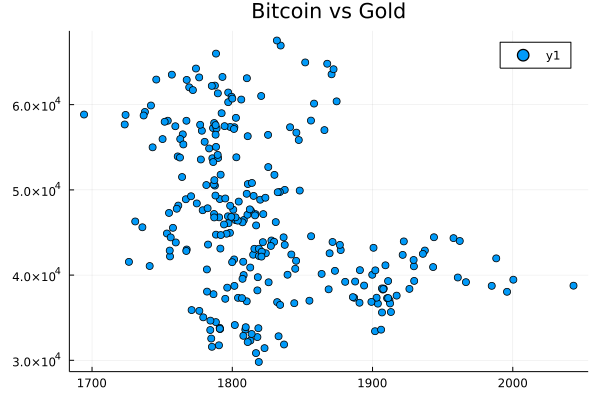

In [11]:
plot(dataTotal.PriceGold, dataTotal.PriceBitcoin, seriestype = :scatter, title="Bitcoin vs Gold")

In [12]:
N = size(dataTotal.PriceGold,1);
b = Array(dataTotal.PriceBitcoin);
A = [ones(N,1) dataTotal.PriceGold];
println(A)
println(b)

[1.0 1957.75; 1.0 1962.2; 1.0 1937.3; 1.0 1921.5; 1.0 1929.5; 1.0 1929.3; 1.0 1943.2; 1.0 1909.2; 1.0 1929.7; 1.0 1960.8; 1.0 1985.0; 1.0 2000.4; 1.0 1988.2; 1.0 2043.3; 1.0 1995.9; 1.0 1966.6; 1.0 1935.9; 1.0 1922.3; 1.0 1943.8; 1.0 1900.7; 1.0 1887.6; 1.0 1926.3; 1.0 1910.4; 1.0 1907.4; 1.0 1912.05; 1.0 1908.0; 1.0 1899.8; 1.0 1902.0; 1.0 1871.5; 1.0 1856.2; 1.0 1869.4; 1.0 1842.1; 1.0 1837.4; 1.0 1836.6; 1.0 1827.9; 1.0 1821.8; 1.0 1807.8; 1.0 1804.1; 1.0 1810.3; 1.0 1801.5; 1.0 1796.4; 1.0 1786.6; 1.0 1795.0; 1.0 1832.0; 1.0 1855.0; 1.0 1844.2; 1.0 1834.1; 1.0 1844.9; 1.0 1845.5; 1.0 1814.9; 1.0 1819.05; 1.0 1815.75; 1.0 1819.0; 1.0 1823.9; 1.0 1829.8; 1.0 1821.0; 1.0 1801.3; 1.0 1799.9; 1.0 1791.5; 1.0 1827.5; 1.0 1817.0; 1.0 1802.4; 1.0 1831.0; 1.0 1816.6; 1.0 1808.2; 1.0 1813.3; 1.0 1811.1; 1.0 1814.0; 1.0 1804.6; 1.0 1791.1; 1.0 1796.9; 1.0 1807.3; 1.0 1800.7; 1.0 1766.9; 1.0 1774.7; 1.0 1790.6; 1.0 1787.0; 1.0 1778.9; 1.0 1787.6; 1.0 1786.8; 1.0 1781.5; 1.0 1785.8; 1.0 1764.7;

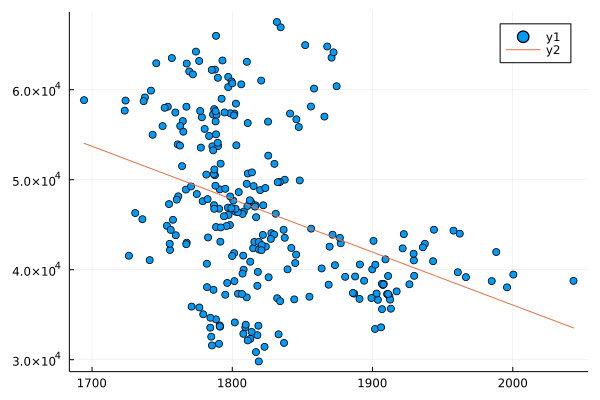

In [13]:
beta1 = inv(transpose(A)*A)*(transpose(A)*b)
xhat2 = pinv(A)*b
x = transpose(A)*A \ transpose(A)*b
xhat3 = A\b
qrA = qr(A);                    
xhat4 = qrA\b
xhat = xhat4
pred = xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(A[:,2],b, seriestype = :scatter)
plot!(A[:,2],pred)


# BITCOIN VS OIL

In [14]:
plot(dataTotal.PriceOil, dataTotal.PriceBitcoin, seriestype = :scatter, title="Bitcoin vs Oil")

LoadError: ArgumentError: column name :PriceOil not found in the data frame

In [15]:
N = size(dataTotal.PriceOil,1);
b = Array(dataTotal.PriceBitcoin);
A = [ones(N,1) dataTotal.PriceOil];
println(A)
println(b)

LoadError: ArgumentError: column name :PriceOil not found in the data frame

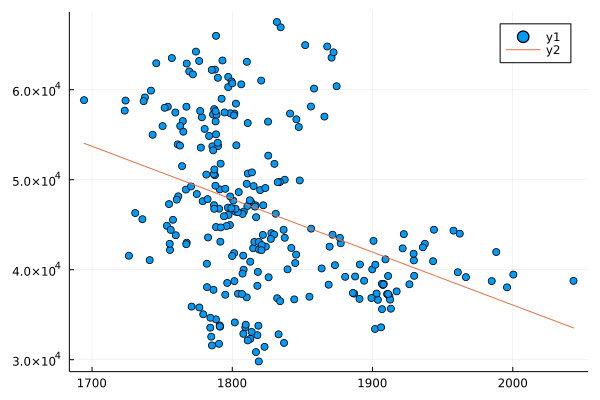

In [16]:
beta1 = inv(transpose(A)*A)*(transpose(A)*b)
xhat2 = pinv(A)*b
x = transpose(A)*A \ transpose(A)*b
xhat3 = A\b
qrA = qr(A);                    
xhat4 = qrA\b
xhat = xhat4
pred = xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(A[:,2],b, seriestype = :scatter)
plot!(A[:,2],pred)


# BITCOIN VS SILVER

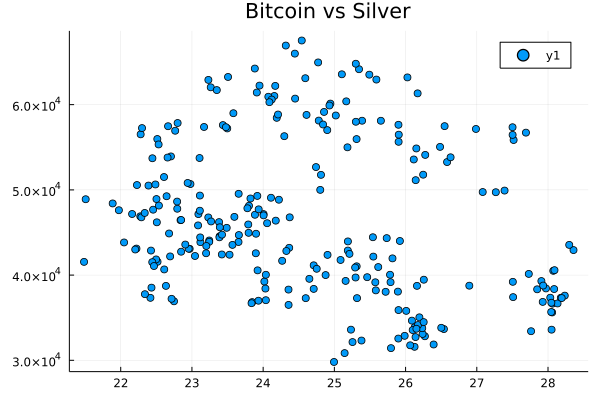

In [17]:
plot(dataTotal.PriceSilver, dataTotal.PriceBitcoin, seriestype = :scatter, title="Bitcoin vs Silver")

In [18]:
N = size(dataTotal.PriceSilver,1);
b = Array(dataTotal.PriceBitcoin);
A = [ones(N,1) dataTotal.PriceSilver];
println(A)
println(b)

[1.0 25.735; 1.0 25.92; 1.0 25.189; 1.0 24.904; 1.0 25.313; 1.0 25.087; 1.0 25.616; 1.0 24.71; 1.0 25.158; 1.0 25.298; 1.0 26.16; 1.0 26.256; 1.0 25.816; 1.0 26.895; 1.0 25.72; 1.0 25.789; 1.0 25.212; 1.0 25.19; 1.0 25.541; 1.0 24.366; 1.0 24.017; 1.0 24.71; 1.0 24.598; 1.0 24.356; 1.0 24.038; 1.0 24.032; 1.0 24.038; 1.0 23.922; 1.0 23.654; 1.0 23.39; 1.0 23.897; 1.0 23.42; 1.0 23.569; 1.0 23.386; 1.0 23.243; 1.0 23.119; 1.0 22.517; 1.0 22.417; 1.0 22.748; 1.0 22.635; 1.0 22.432; 1.0 22.34; 1.0 22.714; 1.0 23.846; 1.0 23.934; 1.0 23.837; 1.0 24.357; 1.0 24.752; 1.0 24.267; 1.0 23.528; 1.0 23.043; 1.0 22.968; 1.0 22.954; 1.0 23.199; 1.0 23.243; 1.0 22.848; 1.0 22.497; 1.0 22.443; 1.0 22.221; 1.0 23.202; 1.0 23.086; 1.0 22.84; 1.0 23.381; 1.0 23.091; 1.0 22.848; 1.0 23.111; 1.0 22.979; 1.0 22.94; 1.0 22.792; 1.0 22.502; 1.0 22.275; 1.0 22.507; 1.0 22.455; 1.0 21.508; 1.0 21.887; 1.0 22.29; 1.0 22.16; 1.0 21.974; 1.0 22.39; 1.0 22.487; 1.0 22.228; 1.0 22.445; 1.0 22.28; 1.0 22.299; 1.0 22

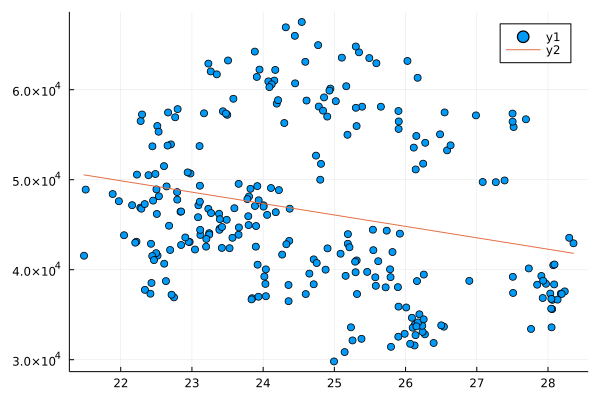

In [19]:
beta1 = inv(transpose(A)*A)*(transpose(A)*b)
xhat2 = pinv(A)*b
x = transpose(A)*A \ transpose(A)*b
xhat3 = A\b
qrA = qr(A);                    
xhat4 = qrA\b
xhat = xhat4
pred = xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(A[:,2],b, seriestype = :scatter)
plot!(A[:,2],pred)